In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,nltk

In [2]:
data =pd.read_excel('../data/bengali_hate_v2.xlsx')
data.head()

,Sentence,Label,target
0,বৌদির দুধ দেকে তো আমার ই চোখ ঠিক ছিলো না - পোল...,Personal,0
1,এই সরকার কে যারা নির্লজ্জের মত সাপোর্ট দিয়েছে ...,Political,1
2,পিলখানা হত্যাকান্ড বাংলাদেশের প্রতিরক্ষা ব্যবস...,Geopolitical,3
3,ভারতের অর্থনীতি নিয়ে আপনাদের ভাবতে হবে না। ভা...,Geopolitical,3
4,খানকির পুলা মালায়নদের মেরে সাফা করে ফেল,Personal,0


In [3]:
data.groupby('Label').size().reset_index(name='counts')

,Label,counts
0,Geopolitical,1738
1,Personal,2189
2,Political,814
3,Religious,957


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5698 entries, 0 to 5697
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  5698 non-null   object
 1   Label     5698 non-null   object
 2   target    5698 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 133.7+ KB


In [7]:
data.dropna(inplace=True)

<AxesSubplot:xlabel='Label', ylabel='count'>

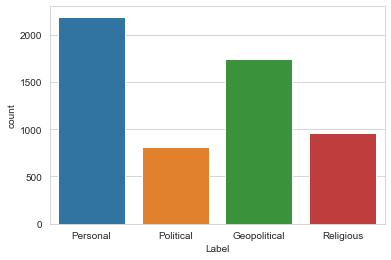

In [8]:
sns.set_style('whitegrid')
sns.countplot(x = 'Label', data = data)

In [4]:
def process_sentences(Sentence): 
    Sentence = re.sub('[^\u0980-\u09FF]',' ',Sentence)
    Sentence = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', Sentence)
    Sentence = re.sub(r'(\W)(?=\1)', '', Sentence)
    Sentence = re.sub(r'https?:\/\/.*[\r\n]*', '', Sentence, flags=re.MULTILINE)
    Sentence = re.sub(r'\<a href', ' ', Sentence)
    Sentence = re.sub(r'&amp;', '', Sentence) 
    Sentence = re.sub(r'<br />', ' ', Sentence)
    Sentence = re.sub(r'\'', ' ', Sentence)
    Sentence = re.sub(r'ߑͰߑ̰ߒנ', '', Sentence)
    Sentence = re.sub(r'ߎɰߎɰߎɍ', '', Sentence)
    return Sentence

In [5]:
data['Sentence'] = data['Sentence'].apply(process_sentences)  
data

,Sentence,Label,target
0,বৌদির দুধ দেকে তো আমার ই চোখ ঠিক ছিলো না পোলাপ...,Personal,0
1,এই সরকার কে যারা নির্লজ্জের মত সাপোর্ট দিয়েছে ...,Political,1
2,পিলখানা হত্যাকান্ড বাংলাদেশের প্রতিরক্ষা ব্যবস...,Geopolitical,3
3,ভারতের অর্থনীতি নিয়ে আপনাদের ভাবতে হবে না ভার...,Geopolitical,3
4,খানকির পুলা মালায়নদের মেরে সাফা করে ফেল,Personal,0
...,...,...,...
5693,জুতা যতই দামি হোক তার স্থান পায়ে তার স্থান কখ...,Personal,0
5694,আমাদের দেশ ছোট বলে ভারতের চেয়ে পিছিয়ে না হয় ...,Geopolitical,3
5695,হিন্দুদের মধ্যে এগুলো হয় এটাই তার বাস্তব প্রমা...,Personal,0
5696,দেখলে মনে হয় শালী একটা অস্ট্রেলিয়ান গাভী,Personal,0


In [9]:
# Length of each Text
data['length'] = data['Sentence'].apply(lambda x:len(x.split()))
# Remove the Text with least words
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Text".format(len(data)-len(dataset)),
      "\nTotal Text:",len(dataset))

After Cleaning: 
Removed 0 Small Text 
Total Text: 5698


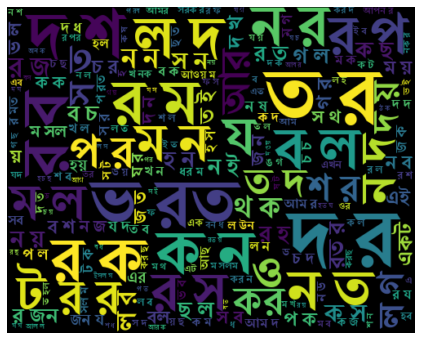

In [10]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in data['Sentence']])
wordCloud = WordCloud(font_path='../ShonarBangla/Shonarb.ttf', width =500, height =400, random_state = 21, max_font_size = 119).generate(allWords)

fig = plt.figure(1, figsize=(10, 6))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [11]:
def data_summary(dataset):
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.Sentence) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Label.value_counts().to_dict().items()]
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Label==label].Sentence) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        documents.append(len(list(dataset[dataset.Label==label].Sentence)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Label==label].Sentence))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

documents,words,u_words,class_names = data_summary(dataset)   


Class Name :  Personal
Number of Documents:2189
Number of Words:27804
Number of Unique Words:7658
Most Frequent Words:

না	482
করে	296
এই	293
আর	272
কি	269
কে	182
হয়	181
তো	174
আমি	150
তোর	149

Class Name :  Geopolitical
Number of Documents:1738
Number of Words:34582
Number of Unique Words:9118
Most Frequent Words:

ভারত	532
না	509
ভারতের	463
করে	382
আর	363
কি	230
এই	198
আমাদের	190
ভারতে	188
বাংলাদেশ	174

Class Name :  Religious
Number of Documents:957
Number of Words:15209
Number of Unique Words:4984
Most Frequent Words:

না	235
করে	192
মালাউন	158
আর	156
ধর্ম	117
এই	110
কি	109
হিন্দু	97
মুসলিম	86
মালাউনের	83

Class Name :  Political
Number of Documents:814
Number of Words:13095
Number of Unique Words:4289
Most Frequent Words:

না	206
করে	148
রাজাকার	139
আর	137
এই	96
লীগ	93
ও	93
হবে	82
কি	82
কে	79
Total Number of Unique Words:17567


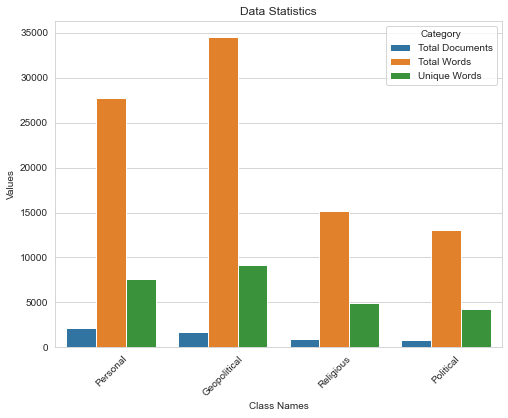

In [12]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

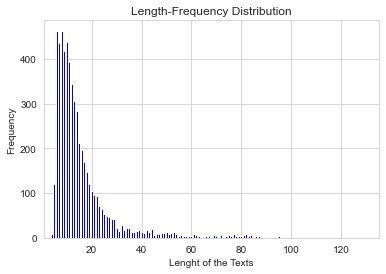

Maximum Length of a Text: 101
Minimum Length of a Text: 4
Average Length of a Text: 16.0


In [13]:
# Calculate the Text of each of the Text
dataset['TextLength'] = dataset.Sentence.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.TextLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Text: {max(dataset.TextLength)}")
print(f"Minimum Length of a Text: {min(dataset.TextLength)}")
print(f"Average Length of a Text: {round(np.mean(dataset.TextLength),0)}")

In [14]:
# Label Encoding Function 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def label_encoding(sentiment,bool):

    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) 
    class_names =le.classes_ 
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

In [15]:
# Dataset Splitting Function 

def dataset_split(feature_space,sentiment):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.8,
                                                  test_size = 0.20,random_state =22,stratify=sentiment)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test


In [16]:
def calc_gram_tfidf(reviews,gram):

    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [18]:
# Unigram Tf-idf value calculation
          

def calc_unigram_tfidf(reviews):
    tfidf = TfidfVectorizer(use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X



In [19]:
# Bi-gram Tf-idf value calculation
                                            

def calc_bigram_tfidf(reviews):
    tfidf = TfidfVectorizer(ngram_range=(1,2),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X



In [20]:
# Tri-gram Tf-idf value calculation
                                            

def calc_trigram_tfidf(reviews):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X



In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [22]:
def model_defination():
    lr_model = LogisticRegression(random_state = 123, max_iter = 10000)
    dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 1, min_samples_split = 25)
    rf_model = RandomForestClassifier(criterion ='entropy', random_state = 13)
    mnb_model = MultinomialNB(alpha=0.431)
    knn_model = KNeighborsClassifier(n_neighbors=100, metric = 'minkowski', algorithm = 'ball_tree', n_jobs = 10)
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    sgd_model = SGDClassifier(loss ='log',penalty='l2', max_iter=5)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM','SGD']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model,sgd_model]
    return ml_models,model_names

In [23]:
def model_performace(model,X_train,X_test,y_train,y_test):
    my_dict = {}
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='micro'),4)*100 
    
    return my_dict  

In [24]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM','SGD'])
    performance_df.style.highlight_max(color = 'lightgreen', axis = 0)
    return performance_df

In [25]:
path = "../json/Bengali Hate Speech V2/"

In [26]:
import json
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.Sentence,gram)
    labels = label_encoding(dataset.Label,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = model_defination()
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

Feature Size :======> 17567

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 5698 
	Training		 4558 
	Test			 1140


C:\Users\afrim\.conda\envs\tensorflow1\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\afrim\.conda\envs\tensorflow1\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Feature Size :======> 86798

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 5698 
	Training		 4558 
	Test			 1140


C:\Users\afrim\.conda\envs\tensorflow1\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\afrim\.conda\envs\tensorflow1\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Feature Size :======> 163930

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 5698 
	Training		 4558 
	Test			 1140


C:\Users\afrim\.conda\envs\tensorflow1\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\Users\afrim\.conda\envs\tensorflow1\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [27]:
accuracy1 = json.load(open('../json/Bengali Hate Speech V2/ml_performance_Unigram.json'))
table = performance_table(accuracy1)
table

,Accuracy,Precision,Recall,F1 Score
LR,74.91,74.91,74.91,74.91
DT,46.75,46.75,46.75,46.75
RF,75.70,75.70,75.70,75.70
MNB,69.39,69.39,69.39,69.39
KNN,68.51,68.51,68.51,68.51
Linear SVM,62.81,62.81,62.81,62.81
RBF SVM,68.77,68.77,68.77,68.77
SGD,76.67,76.67,76.67,76.67


In [28]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by SGD at = 76.67
Highest F1-Score achieved by SGD at = 76.67
Highest Precision Score achieved by SGD at = 76.67
Highest Recall Score achieved by SGD at = 76.67


In [29]:
accuracy2 = json.load(open('../json/Bengali Hate Speech V2/ml_performance_Bigram.json'))
table2 = performance_table(accuracy2)
table2

,Accuracy,Precision,Recall,F1 Score
LR,68.95,68.95,68.95,68.95
DT,46.75,46.75,46.75,46.75
RF,74.30,74.30,74.30,74.30
MNB,65.96,65.96,65.96,65.96
KNN,68.16,68.16,68.16,68.16
Linear SVM,50.96,50.96,50.96,50.96
RBF SVM,57.72,57.72,57.72,57.72
SGD,71.40,71.40,71.40,71.40


In [30]:
print(f"Highest Accuracy achieved by {table2.Accuracy.idxmax(axis = 0)} at = {max(table2.Accuracy)}")
print(f"Highest F1-Score achieved by {table2['F1 Score'].idxmax(axis = 0)} at = {max(table2['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table2['Precision'].idxmax(axis = 0)} at = {max(table2['Precision'] )}")
print(f"Highest Recall Score achieved by {table2['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by RF at = 74.3
Highest F1-Score achieved by RF at = 74.3
Highest Precision Score achieved by RF at = 74.3
Highest Recall Score achieved by RF at = 76.67


In [31]:
accuracy3 = json.load(open('../json/Bengali Hate Speech V2/ml_performance_Trigram.json'))
table3 = performance_table(accuracy3)
table3

,Accuracy,Precision,Recall,F1 Score
LR,65.35,65.35,65.35,65.35
DT,46.75,46.75,46.75,46.75
RF,72.11,72.11,72.11,72.11
MNB,62.54,62.54,62.54,62.54
KNN,67.98,67.98,67.98,67.98
Linear SVM,42.02,42.02,42.02,42.02
RBF SVM,51.67,51.67,51.67,51.67
SGD,67.89,67.89,67.89,67.89


In [32]:
print(f"Highest Accuracy achieved by {table3.Accuracy.idxmax(axis = 0)} at = {max(table3.Accuracy)}")
print(f"Highest F1-Score achieved by {table3['F1 Score'].idxmax(axis = 0)} at = {max(table3['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table3['Precision'].idxmax(axis = 0)} at = {max(table3['Precision'] )}")
print(f"Highest Recall Score achieved by {table3['Recall'].idxmax(axis = 0)} at = {max(table3['Recall'] )}")

Highest Accuracy achieved by RF at = 72.11
Highest F1-Score achieved by RF at = 72.11
Highest Precision Score achieved by RF at = 72.11
Highest Recall Score achieved by RF at = 72.11


In [33]:
classifier1 = SGDClassifier(loss ='log',penalty='l2', max_iter=5)
classifier1.fit(X_train, y_train)

C:\Users\afrim\.conda\envs\tensorflow1\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(loss='log', max_iter=5)

In [34]:
y_pred = classifier1.predict(X_test)
y_pred[:10]

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [35]:
print(f"Train Accuracy is: {round(classifier1.score(X_train, y_train)*100,2)}%")
print(f"Test Accuracy is : {round(classifier1.score(X_test, y_test)*100,2)}%")

Train Accuracy is: 99.52%
Test Accuracy is : 68.07%


In [36]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       348
           1       0.59      0.98      0.74       438
           2       0.95      0.21      0.35       163
           3       0.90      0.29      0.44       191

    accuracy                           0.68      1140
   macro avg       0.81      0.56      0.58      1140
weighted avg       0.76      0.68      0.64      1140



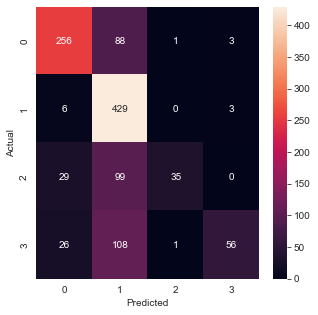

In [37]:
conf_mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()